# My YouTube Watch History Analysis

### **Goal**

- To find out what my most watched videos are
- To find recuring topics or keywords in the titles
- To find out the days and hours I was watching Youtube the most
- To gain a general overview of my interests

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('classic')

In [2]:
data = pd.read_csv("watch_history.csv")

### Data Cleaning and Normalization

In [3]:
data[data["title"].isna() & data["channel"].isna()]

,service,title,channel,date_watched,links
496,YouTube,NaN,NaN,Answered survey questionQuestion: Uyavuma yini...,[]
3196,YouTube,NaN,NaN,Answered survey questionQuestion: Sicela uling...,[]
3576,YouTube,NaN,NaN,Answered survey questionQuestion: Uyavuma yini...,[]
5161,YouTube,NaN,NaN,Answered survey questionQuestion: Sicela uling...,[]
6745,YouTube,NaN,NaN,Answered survey questionQuestion: Sicela uling...,[]
7634,YouTube,NaN,NaN,Answered survey questionQuestion: Uyavuma yini...,[]
8492,YouTube,NaN,NaN,Answered survey questionQuestion: Uyavuma yini...,[]
9019,YouTube,NaN,NaN,Answered survey questionQuestion: Sicela uling...,[]
10816,YouTube,NaN,NaN,Answered survey questionQuestion: Uyavuma yini...,[]
11393,YouTube,NaN,NaN,Answered survey questionQuestion: Uyavuma yini...,[]


Removing all irrelevant rows. 

In this case, where title and channel is null. 

Then where just titles are null. 

In [4]:
data = data.dropna(subset=['title', "channel"], how='all')

In [5]:
data = data[~(data["title"].isnull())]

In [6]:
data[data["channel"].isnull()]

,service,title,channel,date_watched,links
685,YouTube,https://www.youtube.com/watch?v=LTTrW7v5QTY,NaN,Watched https://www.youtube.com/watch?v=LTTrW7...,['https://www.youtube.com/watch?v=LTTrW7v5QTY']
973,YouTube,https://www.youtube.com/watch?v=ELjrzfcEM20,NaN,Watched https://www.youtube.com/watch?v=ELjrzf...,['https://www.youtube.com/watch?v=ELjrzfcEM20']
1032,YouTube,https://www.youtube.com/watch?v=W0SHekAr5HQ,NaN,Watched https://www.youtube.com/watch?v=W0SHek...,['https://www.youtube.com/watch?v=W0SHekAr5HQ']
1068,YouTube,https://www.youtube.com/watch?v=28U9pvoZMKc,NaN,Watched https://www.youtube.com/watch?v=28U9pv...,['https://www.youtube.com/watch?v=28U9pvoZMKc']
1786,YouTube,https://www.youtube.com/watch?v=UR5g0EOxShc,NaN,Watched https://www.youtube.com/watch?v=UR5g0E...,['https://www.youtube.com/watch?v=UR5g0EOxShc']
...,...,...,...,...,...
29069,YouTube,https://www.youtube.com/watch?v=wrWrfwX_9Qw,NaN,Watched https://www.youtube.com/watch?v=wrWrfw...,['https://www.youtube.com/watch?v=wrWrfwX_9Qw']
29071,YouTube,https://www.youtube.com/watch?v=rjaL94yEJME,NaN,Watched https://www.youtube.com/watch?v=rjaL94...,['https://www.youtube.com/watch?v=rjaL94yEJME']
29073,YouTube,https://www.youtube.com/watch?v=KuWhjxNPJlo,NaN,Watched https://www.youtube.com/watch?v=KuWhjx...,['https://www.youtube.com/watch?v=KuWhjxNPJlo']
29086,YouTube,https://www.youtube.com/watch?v=cNKnB0tbZI8,NaN,Watched https://www.youtube.com/watch?v=cNKnB0...,['https://www.youtube.com/watch?v=cNKnB0tbZI8']


Checked the links to rows where only Channels were null.

These rows are videos that are now unavailable on YouTube or YouTube Music

Replaced all the values where channels are missing with  `Unknown Channel`, then `Video Unavailable` for titles.

In [7]:
data.loc[data['channel'].isna(), 'channel'] = "Unknown Channel"
data.loc[data['channel'] == "Unknown Channel", 'title'] = "Video Unavailable"

The dates were mixed up with unwanted strings and characters.

Removed all the unwanted strings and characters and converted the `date_watched` column to datetime format.

In [8]:
import re
def extract_datetime(text):
    # Define the regex pattern for extracting the date and time
    pattern = r'(\w+\s\d{1,2},\s\d{4},\s\d{1,2}:\d{2}:\d{2}\s[APM]+\s[WAT]*)'
    match = re.search(pattern, text)
    if match:
        return match.group(0)
    else:
        return None

data["date_watched"] = data["date_watched"].apply(extract_datetime)
data["date_watched"].head(14)

0                    PMOct 12, 2024, 10:46:29 PM WAT
1             CellmatesOct 12, 2024, 10:32:29 PM WAT
2                  NanaOct 12, 2024, 10:32:24 PM WAT
3                    PMOct 12, 2024, 10:32:18 PM WAT
4     MinutesByteByteGoOct 12, 2024, 10:26:26 PM WAT
5                    PMOct 12, 2024, 10:26:00 PM WAT
6               PiwPiewOct 12, 2024, 10:23:47 PM WAT
7                    PMOct 12, 2024, 10:20:35 PM WAT
8                MansonOct 12, 2024, 10:11:31 PM WAT
9                    PMOct 12, 2024, 10:11:22 PM WAT
10           MantinbandOct 12, 2024, 10:08:00 PM WAT
11                   AMOct 12, 2024, 10:07:53 PM WAT
12                   PMOct 12, 2024, 10:07:48 PM WAT
13                 LessOct 12, 2024, 10:02:29 PM WAT
Name: date_watched, dtype: object

In [9]:
def clean_datetime(series):
    # Remove specific prefixes (like 'Crgpug')
    cleaned = series.str.replace(r'^.*?(?=\w{3} \d{1,2})', '', regex=True)
    
    # Remove 'WAT' and strip any extra whitespace
    cleaned = cleaned.str.strip().str.replace(' WAT', '')
    
    return pd.to_datetime(cleaned, format='%b %d, %Y, %I:%M:%S %p')



data['date_watched'] = clean_datetime(data['date_watched'])
print(data['date_watched'])

0       2024-10-12 22:46:29
1       2024-10-12 22:32:29
2       2024-10-12 22:32:24
3       2024-10-12 22:32:18
4       2024-10-12 22:26:26
                ...        
29141   2017-09-20 00:13:52
29142   2017-09-20 00:10:14
29143   2017-09-20 00:09:08
29144   2017-09-20 00:07:36
29145   2017-09-20 00:03:11
Name: date_watched, Length: 28960, dtype: datetime64[ns]


In [ ]:
data[data["channel"] == "Unknown Channel"]

,service,title,channel,date_watched,links
685,YouTube,Video Unavailable,Unknown Channel,2024-09-22 08:10:00,['https://www.youtube.com/watch?v=LTTrW7v5QTY']
973,YouTube,Video Unavailable,Unknown Channel,2024-09-09 00:01:32,['https://www.youtube.com/watch?v=ELjrzfcEM20']
1032,YouTube,Video Unavailable,Unknown Channel,2024-09-06 23:13:21,['https://www.youtube.com/watch?v=W0SHekAr5HQ']
1068,YouTube,Video Unavailable,Unknown Channel,2024-09-03 23:29:04,['https://www.youtube.com/watch?v=28U9pvoZMKc']
1786,YouTube,Video Unavailable,Unknown Channel,2024-07-18 18:17:00,['https://www.youtube.com/watch?v=UR5g0EOxShc']
...,...,...,...,...,...
29069,YouTube,Video Unavailable,Unknown Channel,2018-08-11 01:52:09,['https://www.youtube.com/watch?v=wrWrfwX_9Qw']
29071,YouTube,Video Unavailable,Unknown Channel,2018-08-11 01:42:44,['https://www.youtube.com/watch?v=rjaL94yEJME']
29073,YouTube,Video Unavailable,Unknown Channel,2018-08-09 03:44:33,['https://www.youtube.com/watch?v=KuWhjxNPJlo']
29086,YouTube,Video Unavailable,Unknown Channel,2018-07-28 03:12:58,['https://www.youtube.com/watch?v=cNKnB0tbZI8']


In [11]:
top_channels = data["channel"][~(data["channel"] == "Ads") & (data["service"] == "YouTube")].value_counts().head(10)
top_artists = data["channel"][~(data["channel"] == "Ads") & (data["service"] == "YouTube Music")].value_counts().head(10)

In [12]:
filtered_top_channels = top_channels.iloc[1:]
top_artists.index = top_artists.index.str.replace(" - Topic", "")

<Axes: >

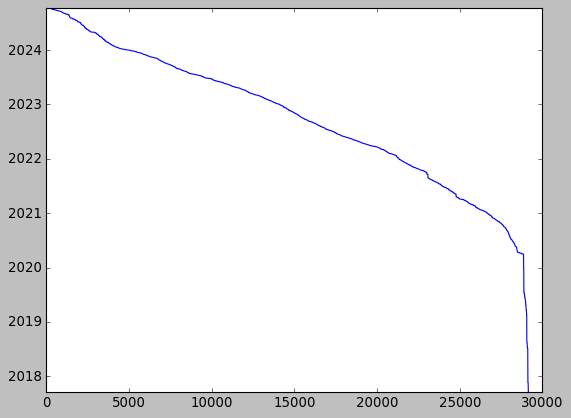

In [13]:
data["date_watched"].plot(kind="line")

In [14]:
data = data.sort_values(by='date_watched')

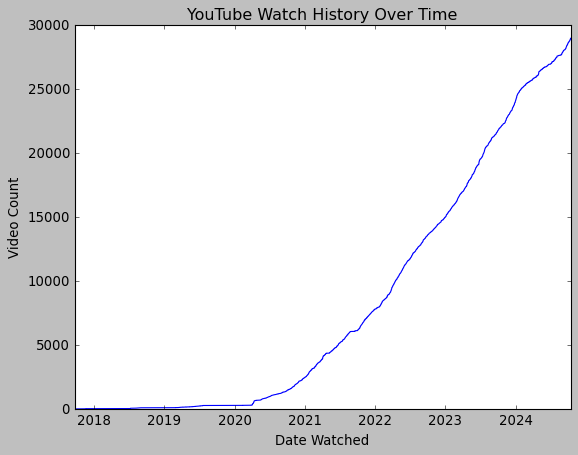

In [15]:
plt.plot(data['date_watched'], range(len(data)), color='blue')  # Use a range for the y-axis
plt.xlabel("Date Watched")
plt.ylabel("Video Count")
plt.title("YouTube Watch History Over Time")
plt.show()

Spliting `date_watched` into date and time formats

In [16]:
from datetime import date, time, datetime
data["date"] = data["date_watched"].dt.date

In [17]:
data["time"] = data["date_watched"].dt.time

In [18]:
# Extract the year from date
data['year'] = data['date_watched'].dt.year

In [19]:
data['month'] = data['date_watched'].dt.month

month_dict = {
    "1": "January",
    "2": "Febuary",
    "3": "March",
    "4": "April",
    "5": "May",
    "6": "June",
    "7": "July",
    "8": "August",
    "9": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

data["month"] = data["month"].astype(str)
data["month"] = data["month"].map(month_dict)

In [20]:
data["date"][~(data["channel"] == "Ads") & (data["service"] == "YouTube")].value_counts().head(5)

date
2024-04-30    94
2023-12-25    92
2023-07-22    83
2024-01-06    82
2023-06-24    75
Name: count, dtype: int64

Categorizing the times into a `time_of_day` column, identifying if the video was watched in the **Morning**, **Afternoon**, **Evening** and **Bedtime**

In [21]:
def categorize_time(t):
    if time(6, 0) <= t <= time(11, 59):
        return 'Morning'
    elif time(12, 0) <= t <= time(16, 59):
        return 'Afternoon'
    elif time(17, 0) <= t <= time(22, 59):
        return 'Evening'
    else:
        return 'BedTime'

In [22]:
# Create the 'time_of_day' column
data["time_of_day"] = data['time'].apply(categorize_time)

In [23]:
data["time_of_day"][~(data["channel"] == "Ads") & (data["service"] == "YouTube")].value_counts().head(20)

time_of_day
Evening      5674
BedTime      5445
Afternoon    3472
Morning      3357
Name: count, dtype: int64

In [24]:
data[data["time_of_day"] == "Evening"].head(5)

,service,title,channel,date_watched,links,date,time,year,month,time_of_day
29076,YouTube,This is FORTNITE - This is America Recreation,WiziBlimp,2018-08-07 17:03:26,['https://www.youtube.com/watch?v=YhSFQXBVt1E'],2018-08-07,17:03:26,2018,August,Evening
29007,YouTube,How to Make Classic Roasted Chicken at Home - ...,Williams Sonoma,2019-04-03 21:28:48,['https://www.youtube.com/watch?v=8kwXGDwS1Og'],2019-04-03,21:28:48,2019,April,Evening
28995,YouTube,Sony reveals first PS5 details at last,Engadget,2019-04-22 17:00:55,['https://www.youtube.com/watch?v=0veW5-uDN1g'],2019-04-22,17:00:55,2019,April,Evening
28994,YouTube,Video Unavailable,Unknown Channel,2019-04-22 17:02:42,['https://www.youtube.com/watch?v=Xg0C0lPXq9k'],2019-04-22,17:02:42,2019,April,Evening
28993,YouTube,Learn How to Draw Patriot! | Marvel Quickdraw,Marvel Entertainment,2019-04-22 17:04:41,['https://www.youtube.com/watch?v=Zg0SgtOnwD8'],2019-04-22,17:04:41,2019,April,Evening


In [25]:
data[data["date"] == date(2024, 4, 30)].head()

,service,title,channel,date_watched,links,date,time,year,month,time_of_day
2856,YouTube,Exness Trade: Online Trading - Better Conditio...,Ads,2024-04-30 06:32:11,['https://www.youtube.com/watch?v=5QzY6zx_TSE'],2024-04-30,06:32:11,2024,April,Morning
2855,YouTube,Rabbit R1: Barely Reviewable,Marques Brownlee,2024-04-30 06:32:16,['https://www.youtube.com/watch?v=ddTV12hErTc'],2024-04-30,06:32:16,2024,April,Morning
2854,YouTube,Her friend taught her a lesson… #movie #fyp,Clarity Clips,2024-04-30 06:53:02,['https://www.youtube.com/watch?v=jxtyv4VY8uk'],2024-04-30,06:53:02,2024,April,Morning
2853,YouTube,The evolution of streaming is so innovative,Morning Brew,2024-04-30 06:54:07,['https://www.youtube.com/watch?v=G2Yss_Rt15w'],2024-04-30,06:54:07,2024,April,Morning
2852,YouTube,Step sister buys a private jet 😳,TheJetBusiness,2024-04-30 06:54:53,['https://www.youtube.com/watch?v=JMmL7KgnQRg'],2024-04-30,06:54:53,2024,April,Morning


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28960 entries, 29145 to 0
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   service       28960 non-null  object        
 1   title         28960 non-null  object        
 2   channel       28960 non-null  object        
 3   date_watched  28960 non-null  datetime64[ns]
 4   links         28960 non-null  object        
 5   date          28960 non-null  object        
 6   time          28960 non-null  object        
 7   year          28960 non-null  int32         
 8   month         28960 non-null  object        
 9   time_of_day   28960 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 2.3+ MB


In [27]:
ideal_data = data[~(data["channel"] == "Ads") & ~(data["channel"] == "Unknown Channel")]

### **Content-Type Analysis**: YouTube vs. YouTube Music

The goal here is to determine how much of your activity is from **YouTube (video content)** versus **YouTube Music (audio/music content)**.

In [28]:
service_counts = data["service"].value_counts()
service_percentages = round((service_counts / service_counts.sum()) * 100)
service_percentages

service
YouTube          77.0
YouTube Music    23.0
Name: count, dtype: float64

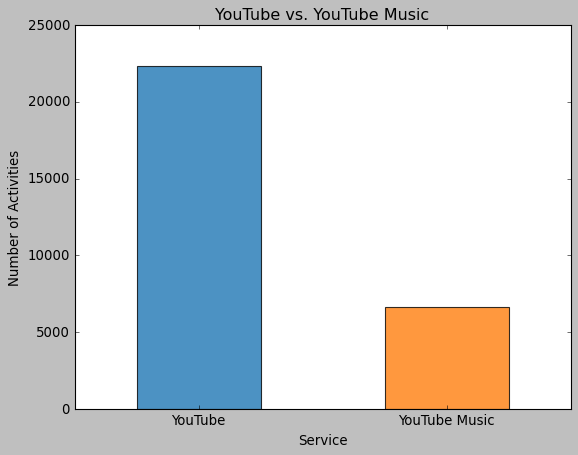

In [29]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
service_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], alpha=0.8)
plt.title("YouTube vs. YouTube Music")
plt.xlabel('Service')
plt.ylabel('Number of Activities')
plt.xticks(rotation=0)
plt.show()

In [30]:
# Group by 'date' and 'service' to count content watched per day
content_trend = data.groupby(['date', 'service']).size().reset_index(name='count')
content_trend

,date,service,count
0,2017-09-20,YouTube,8
1,2017-11-18,YouTube,8
2,2017-11-19,YouTube,11
3,2018-04-17,YouTube,6
4,2018-07-06,YouTube,5
...,...,...,...
2054,2024-10-09,YouTube,4
2055,2024-10-10,YouTube,3
2056,2024-10-11,YouTube,29
2057,2024-10-12,YouTube,86


In [31]:
# Group the data weekly and by service to count content watched
content_trend = (
    data.groupby([pd.Grouper(key='date_watched', freq='W'), 'service'])
    .size()
    .reset_index(name='count')
)
content_trend

,date_watched,service,count
0,2017-09-24,YouTube,8
1,2017-11-19,YouTube,19
2,2018-04-22,YouTube,6
3,2018-07-08,YouTube,25
4,2018-07-22,YouTube,1
...,...,...,...
469,2024-09-29,YouTube Music,2
470,2024-10-06,YouTube,133
471,2024-10-06,YouTube Music,2
472,2024-10-13,YouTube,213


In [32]:
# Pivot the data to reshape for an area graph
pivot_trend = content_trend.pivot(index='date_watched', columns='service', values='count').fillna(0)
pivot_trend

service,YouTube,YouTube Music
date_watched,,
2017-09-24,8.0,0.0
2017-11-19,19.0,0.0
2018-04-22,6.0,0.0
2018-07-08,25.0,0.0
2018-07-22,1.0,0.0
...,...,...
2024-09-15,95.0,3.0
2024-09-22,225.0,5.0
2024-09-29,239.0,2.0


In [33]:
# Add rolling average for smoother trends (e.g., 4-week average)
pivot_trend['YouTube'] = pivot_trend['YouTube'].rolling(window=4).mean()
pivot_trend['YouTube Music'] = pivot_trend['YouTube Music'].rolling(window=4).mean()
pivot_trend

service,YouTube,YouTube Music
date_watched,,
2017-09-24,NaN,NaN
2017-11-19,NaN,NaN
2018-04-22,NaN,NaN
2018-07-08,14.50,0.00
2018-07-22,12.75,0.00
...,...,...
2024-09-15,122.75,1.50
2024-09-22,171.50,2.25
2024-09-29,182.25,2.50


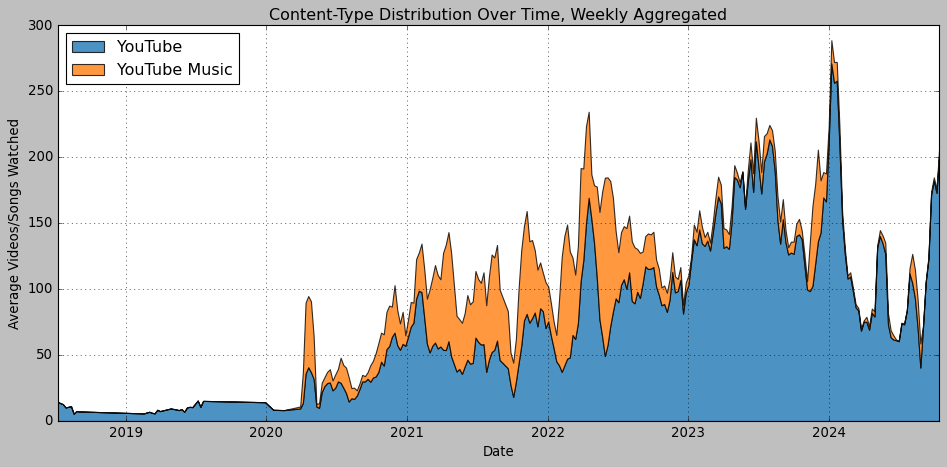

In [34]:
# Plot the area graph
plt.figure(figsize=(12, 6))
plt.stackplot(
    pivot_trend.index, 
    pivot_trend['YouTube'], 
    pivot_trend['YouTube Music'],
    labels=['YouTube', 'YouTube Music'],
    colors=['#1f77b4', '#ff7f0e'],
    alpha=0.8
)
plt.title('Content-Type Distribution Over Time, Weekly Aggregated')
plt.xlabel('Date')
plt.ylabel('Average Videos/Songs Watched') # Rolling
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### **Channel Engagement Analysis**

- Identify the most frequently watched channels/artists.
- Visualize engagement distribution across channels.
- Detect patterns, like whether a few channels dominate your engagement.

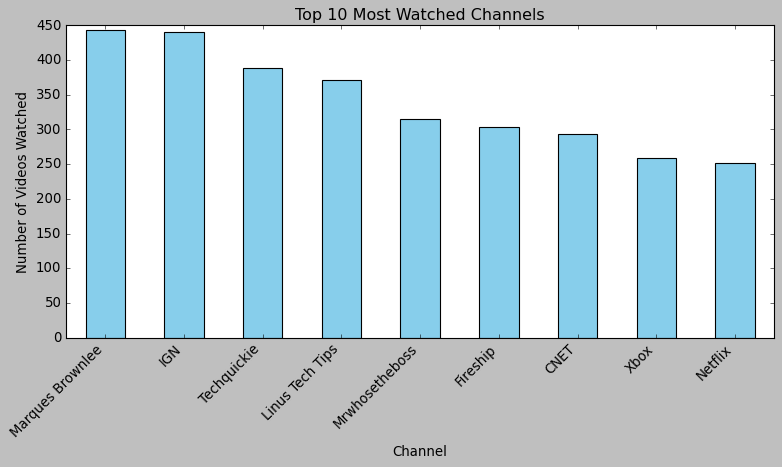

In [35]:
# Bar plot for top 10 channels
plt.figure(figsize=(10, 6))
filtered_top_channels.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Watched Channels')
plt.xlabel('Channel')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

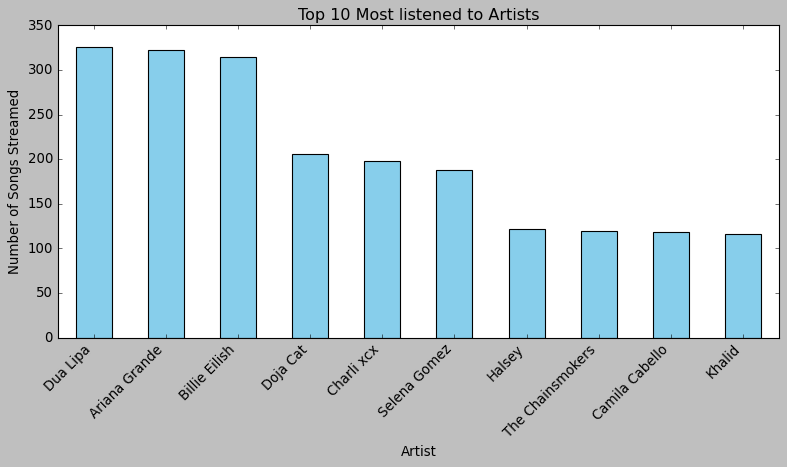

In [36]:
# Bar plot for top 10 channels
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most listened to Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Songs Streamed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Identifying high engagement channnels

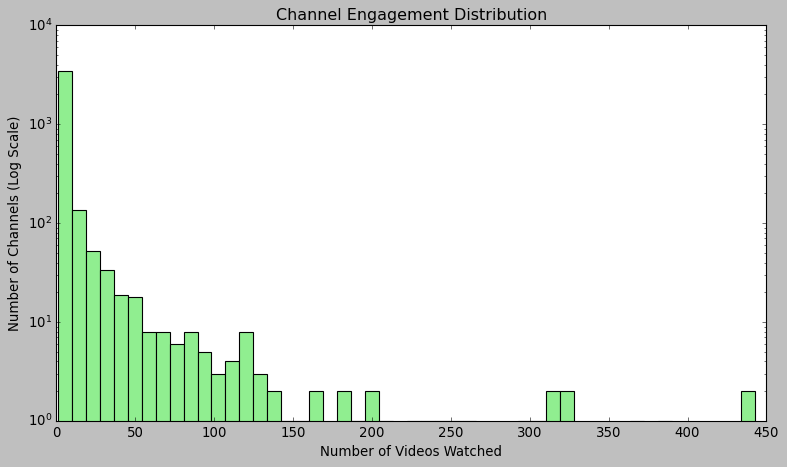

In [37]:
# Plot engagement distribution across all channels
plt.figure(figsize=(10, 6))
plt.hist(ideal_data["channel"].value_counts(), bins=50, color='lightgreen', edgecolor='black', log=True)
plt.title('Channel Engagement Distribution')
plt.xlabel('Number of Videos Watched')
plt.ylabel('Number of Channels (Log Scale)')
plt.tight_layout()
plt.show()


In [38]:
# Group by channel and count videos watched per channel
channel_engagement = ideal_data.groupby('channel')['title'].count().sort_values(ascending=False)

# Add a percentage column
total_engagement = channel_engagement.sum()
channel_engagement_percentage = (channel_engagement / total_engagement) * 100

# Combine both into a single DataFrame
high_engagement_channels = pd.DataFrame({
    'Number of Videos Watched': channel_engagement,
    'Percentage of Total Engagement': channel_engagement_percentage
})

# Display top channels (adjust the number as needed)
high_engagement_channels

,Number of Videos Watched,Percentage of Total Engagement
channel,,
Marques Brownlee,443,1.889206
IGN,440,1.876413
Techquickie,389,1.658919
Linus Tech Tips,371,1.582157
Dua Lipa - Topic,326,1.390251
...,...,...
John Hunter Nemechek,1,0.004265
John Nemesis,1,0.004265
John Schroter,1,0.004265


In [39]:
cumulative_percentage = channel_engagement_percentage.cumsum()
cumulative_percentage

channel
Marques Brownlee          1.889206
IGN                       3.765619
Techquickie               5.424538
Linus Tech Tips           7.006695
Dua Lipa - Topic          8.396947
                           ...    
John Hunter Nemechek     99.982942
John Nemesis             99.987206
John Schroter            99.991471
John Seo                 99.995735
𝙅𝙖𝙣𝙨𝙈𝙪𝙨𝙞𝙘               100.000000
Name: title, Length: 3820, dtype: float64

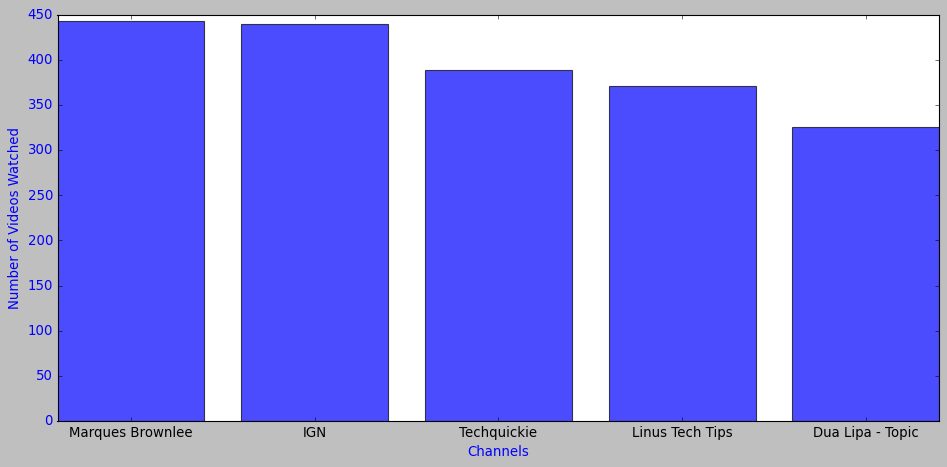

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(channel_engagement.index[:5], channel_engagement[:5], color='blue', alpha=0.7)
plt.ylabel('Number of Videos Watched', color='blue')
plt.xlabel("Channels", color="blue")
plt.tick_params(axis="y", labelcolor="blue")
plt.tight_layout()
plt.show()

C:\Users\Kamiye\AppData\Local\Temp\ipykernel_13076\274850142.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f'{txt}',(channel_engagement.index[:10][i], channel_engagement_percentage[:10][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)


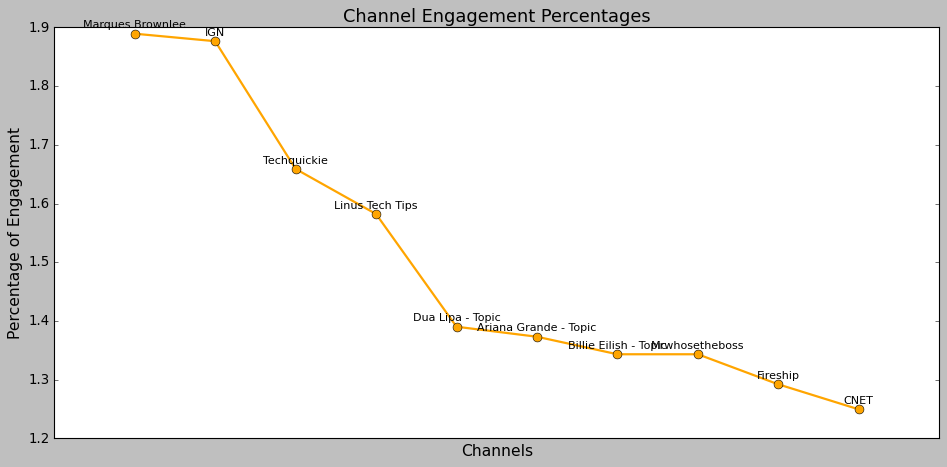

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(channel_engagement.index[:10], channel_engagement_percentage[:10], color='orange', marker="o", linestyle='-', linewidth=2, markersize=8)
plt.ylabel('Percentage of Engagement', fontsize=14)
plt.xlabel('Channels', fontsize=14)
plt.title("Channel Engagement Percentages", fontsize=16)
plt.xticks([])
plt.yticks(fontsize=12)
plt.xlim(-1, len(channel_engagement.index[:10]))
plt.ylim()
# plt.grid(True, linestyle='--', alpha=0.7)

# Adding data labels
for i, txt in enumerate(channel_engagement.index[:10]):
    plt.annotate(f'{txt}',(channel_engagement.index[:10][i], channel_engagement_percentage[:10][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


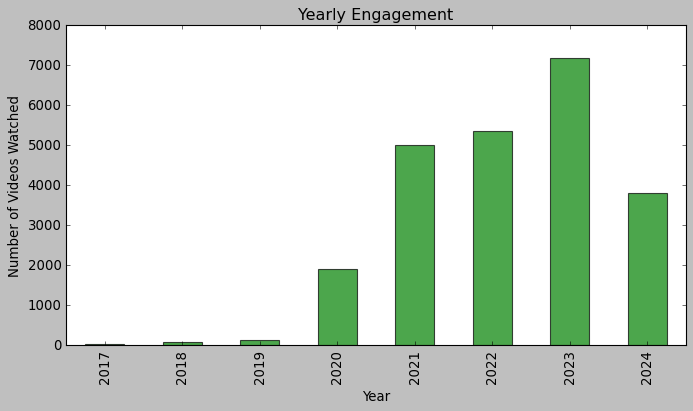

In [42]:
# Group by year
yearly_engagement = ideal_data.groupby('year')['title'].count()

# Plot yearly engagement
plt.figure(figsize=(10, 5))
yearly_engagement.plot(kind='bar', color='green', alpha=0.7)
plt.title('Yearly Engagement')
plt.xlabel('Year')
plt.ylabel('Number of Videos Watched')
plt.show()


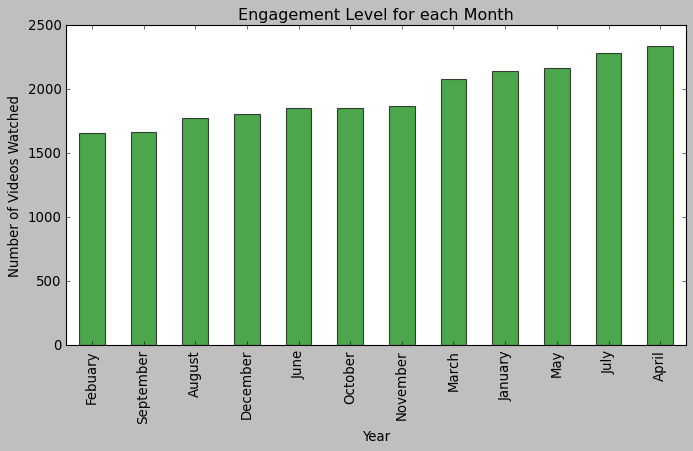

In [43]:
# Group by year
monthly_engagement = ideal_data.groupby('month')['title'].count().sort_values()

# Plot yearly engagement
plt.figure(figsize=(10, 5))
monthly_engagement.plot(kind='bar', color='green', alpha=0.7)
plt.title('Engagement Level for each Month')
plt.xlabel('Year')
plt.ylabel('Number of Videos Watched')
plt.show()

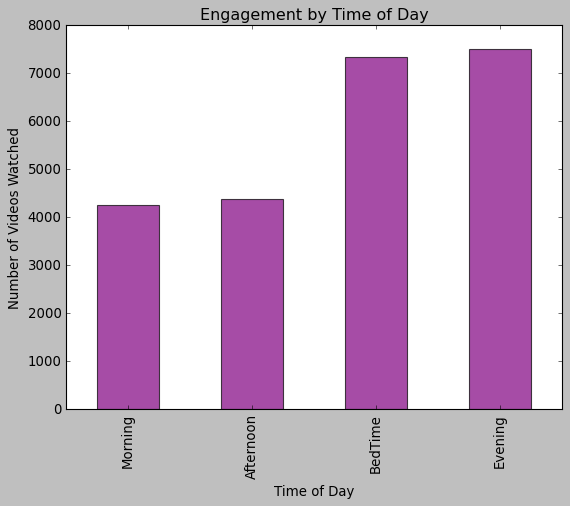

In [44]:
# Group by time_of_day
time_of_day_engagement = ideal_data.groupby('time_of_day')['title'].count().sort_values()

# Plot time of day engagement
time_of_day_engagement.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Engagement by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Videos Watched')
plt.show()

### **Video Context Generation**


In [54]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [53]:
defined_video_categories = [
    "Film & Movies",
    "Cars",
    "Music",
    "Lifestyle",
    "Finance",
    "Education",
    "Science & Technology",
    "Entertainment",
    "News & Politics",
    "Sports",
    "Gaming",
    "Howto & Style"
]

In [58]:
training_data = [
    ("Star Wars Rise of Skywalker 2020 Official Trailer", "Film & Movies"),
    ("The Substance, thoughts and opinions", "Film & Movies"),
    ("Top 10 Fastest Cars in the World", "Cars"),
    ("Tesla Model X Test Drive and Review", "Cars"),
    ("Top 10 Music Hits of the Year", "Music"),
    ("Best Music Festivals of 2020", "Music"),
    ("10 Tips for a Healthy Lifestyle", "Lifestyle"),
    ("How to plan out the best study routine", "Education"),
    ("Top 10 Universities in the World", "Education"),
    ("New discoveries in quantum physics", "Science & Technology"),
    ("The latest in AI and Machine Learning", "Science & Technology"),
    ("Funny cat videos compilation", "Entertainment"),
    ("The best comedy shows of the year", "Entertainment"),
    ("Breaking News: Major Election Updates", "News & Politics"),
    ("The latest in global politics", "News & Politics"),
    ("Top 10 Goals of the Year", "Sports"),
    ("The best sports moments of the year", "Sports"),
    ("Monaco Grand Prix 2020 Highlights", "Sports"),
    ("The best gameplay tips for Call of Duty", "Gaming"),
    ("Top 10 Games of the Year", "Gaming"),
    ("How to do the perfect winged eyeliner", "Howto & Style"),
    ("The latest fashion trends of 2020", "Howto & Style"),
    ("How to cook the perfect steak", "Howto & Style"),
    ("The best financial advice for 2020", "Finance"),
    ("How to invest in the stock market", "Finance"),
    ("The best budgeting tips for 2020", "Finance"),
    ("How to do the perfect winged eyeliner", "Howto & Style"),
    ("The latest fashion trends of 2020", "Howto & Style"),
    ("How to plan out the best study routine", "Howto & Style"),
    ("Top 10 Music Hits of the Year", "Music"),
    ("Breaking News: Major Election Updates", "News & Politics"),
    ("New discoveries in quantum physics", "Science & Technology"),
    ("Funny cat videos compilation", "Entertainment"),
    ("The best gameplay tips for Call of Duty", "Gaming"),
]

training_data = list(set(training_data))
training_data


[('How to do the perfect winged eyeliner', 'Howto & Style'),
 ('The Substance, thoughts and opinions', 'Film & Movies'),
 ('How to plan out the best study routine', 'Howto & Style'),
 ('Breaking News: Major Election Updates', 'News & Politics'),
 ('Top 10 Games of the Year', 'Gaming'),
 ('The best financial advice for 2020', 'Finance'),
 ('The best budgeting tips for 2020', 'Finance'),
 ('New discoveries in quantum physics', 'Science & Technology'),
 ('10 Tips for a Healthy Lifestyle', 'Lifestyle'),
 ('Best Music Festivals of 2020', 'Music'),
 ('How to invest in the stock market', 'Finance'),
 ('The latest in AI and Machine Learning', 'Science & Technology'),
 ('The latest fashion trends of 2020', 'Howto & Style'),
 ('Top 10 Universities in the World', 'Education'),
 ('Funny cat videos compilation', 'Entertainment'),
 ('The best comedy shows of the year', 'Entertainment'),
 ('Star Wars Rise of Skywalker 2020 Official Trailer', 'Film & Movies'),
 ('How to cook the perfect steak', 'Howto

In [55]:
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [56]:
data["processed_title"] = data["title"].apply(preprocess_text)
data["processed_title"]

29145    weeknd - starboy ft. daft punk ( official video )
29144    weeknd - feel coming ft. daft punk ( official ...
29143            weeknd - party monster ( official video )
29142    jason derulo - swalla ( feat . nicki minaj & t...
29141          bruno mar - ’ like [ official music video ]
                               ...                        
4                   10 coding principle explained 5 minute
3                           reveal 's hiding data bigquery
2                                   nginx tutorial - nginx
1        🤖generate excel data chat gpt - create practic...
0                                            daily.dev tom
Name: processed_title, Length: 28960, dtype: object